# Problem Statement

Using the transaction dataset, identify the annual salary for each customer

Exploring correlations between annual salary and various customer attributes (e.g. age). Visualising interesting correlations using a scatter plot.

To Build a simple regression model to predict the annual salary for each customer using the attributes identified above, building a decision-tree based model to predict salary, testing its performance.

# Work Flow

1. Loading the data
2. Feature Engineering
3. Data Splitting
4. Data Modeling
5. Data Evaluation

# Loading the data

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data directory
import os
import pickle

PICKLE_DATA_DIR = os.path.join("..", "cleaned_data", "procesed_data.pkl")
data = pd.read_pickle(PICKLE_DATA_DIR)
data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,weekday,month_name
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,Wednesday,August
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,Wednesday,August
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,Wednesday,August
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,Wednesday,August
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,Wednesday,August


In [3]:
data.shape

(12043, 21)

# Feature Engineering

**Missing Values**

In [4]:
# checking for missing values in the data
data.isnull().sum()

status               0
card_present_flag    0
account              0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
customer_id          0
merchant_long_lat    0
movement             0
weekday              0
month_name           0
dtype: int64

In [5]:
data.describe()

,card_present_flag,balance,age,amount
count,12043.000000,12043.000000,12043.000000,12043.000000
mean,0.873536,14704.195553,30.582330,187.933588
std,0.332385,31503.722652,10.046343,592.599934
min,0.000000,0.240000,18.000000,0.100000
25%,1.000000,3158.585000,22.000000,16.000000
50%,1.000000,6432.010000,28.000000,29.000000
75%,1.000000,12465.945000,38.000000,53.655000
max,1.000000,267128.520000,78.000000,8835.980000


**Categorical Variables**

In [6]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['status',
 'account',
 'long_lat',
 'txn_description',
 'merchant_id',
 'first_name',
 'gender',
 'merchant_suburb',
 'merchant_state',
 'extraction',
 'transaction_id',
 'customer_id',
 'merchant_long_lat',
 'movement',
 'weekday',
 'month_name']

In [7]:
for feature in categorical_features:
    print(feature,':',len(data[feature].unique()))

status : 2
account : 100
long_lat : 100
txn_description : 6
merchant_id : 5726
first_name : 80
gender : 2
merchant_suburb : 1610
merchant_state : 9
extraction : 9442
transaction_id : 12043
customer_id : 100
merchant_long_lat : 2704
movement : 2
weekday : 7
month_name : 3


In [8]:
data.columns

Index(['status', 'card_present_flag', 'account', 'long_lat', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat', 'movement',
       'weekday', 'month_name'],
      dtype='object')

Since, we need to build a model to predict the annual salary for each customer. Lets look at the types of transactions.

In [9]:
data.txn_description.unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [10]:
# for predicting the annual salary we will concentrate on pay/salary of the transactions feature

salaries = data[data['txn_description'] == 'PAY/SALARY'].groupby('customer_id').mean()

In [11]:
salaries.columns

Index(['card_present_flag', 'balance', 'age', 'amount'], dtype='object')

In [12]:
salaries.head()

,card_present_flag,balance,age,amount
customer_id,,,,
CUS-1005756958,1.0,4718.665385,53.0,970.47
CUS-1117979751,1.0,11957.202857,21.0,3578.65
CUS-1140341822,1.0,5841.720000,28.0,1916.51
CUS-1147642491,1.0,8813.467692,34.0,1711.39
CUS-1196156254,1.0,23845.717143,34.0,3903.73


In [13]:
df =[]
for id in data['customer_id']:
    df.append(salaries.loc[id]['amount'].mean())
data['avg_salary'] = df
data['annual_salary'] = 12*data['avg_salary']

In [14]:
data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,weekday,month_name,avg_salary,annual_salary
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,Wednesday,August,1013.67,12164.04
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,Wednesday,August,1013.67,12164.04
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,Wednesday,August,1002.13,12025.56
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,Wednesday,August,892.09,10705.08
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,Wednesday,August,1013.67,12164.04


In [15]:
data.shape

(12043, 23)

In [16]:
pred_sal = data[data['txn_description'] == 'PAY/SALARY']
pred_sal.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,weekday,month_name,avg_salary,annual_salary
50,posted,1.0,ACC-588564840,151.27 -33.76,PAY/SALARY,Missing,Isaiah,8342.11,2018-08-01,M,...,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,CUS-1462656821,Missing,credit,Wednesday,August,3903.95,46847.40
61,posted,1.0,ACC-1650504218,145.01 -37.93,PAY/SALARY,Missing,Marissa,2040.58,2018-08-01,F,...,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,CUS-2500783281,Missing,credit,Wednesday,August,1626.48,19517.76
64,posted,1.0,ACC-3326339947,151.18 -33.80,PAY/SALARY,Missing,Eric,3158.51,2018-08-01,M,...,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,CUS-326006476,Missing,credit,Wednesday,August,983.36,11800.32
68,posted,1.0,ACC-3541460373,145.00 -37.83,PAY/SALARY,Missing,Jeffrey,2517.66,2018-08-01,M,...,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,CUS-1433879684,Missing,credit,Wednesday,August,1408.08,16896.96
70,posted,1.0,ACC-2776252858,144.95 -37.76,PAY/SALARY,Missing,Kristin,2271.79,2018-08-01,F,...,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,CUS-4123612273,Missing,credit,Wednesday,August,1068.04,12816.48


In [17]:
pred_sal.shape

(883, 23)

In [18]:
# encoding the features
from sklearn.preprocessing import LabelEncoder

# label encoding
encoder = LabelEncoder()

for features in categorical_features:
    pred_sal[features] = encoder.fit_transform(pred_sal[features])

<ipython-input-18-43e4f7d8688c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_sal[features] = encoder.fit_transform(pred_sal[features])


In [19]:
pred_sal.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,weekday,month_name,avg_salary,annual_salary
50,0,1.0,89,86,0,0,30,8342.11,2018-08-01,1,...,0,3903.95,528,13,0,0,4,0,3903.95,46847.40
61,0,1.0,19,41,0,0,48,2040.58,2018-08-01,0,...,1,1626.48,83,47,0,0,4,0,1626.48,19517.76
64,0,1.0,63,82,0,0,26,3158.51,2018-08-01,1,...,1,983.36,650,70,0,0,4,0,983.36,11800.32
68,0,1.0,68,40,0,0,33,2517.66,2018-08-01,1,...,2,1408.08,49,12,0,0,4,0,1408.08,16896.96
70,0,1.0,50,33,0,0,41,2271.79,2018-08-01,0,...,2,1068.04,833,83,0,0,4,0,1068.04,12816.48


In [20]:
pred_sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 50 to 12004
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             883 non-null    int32         
 1   card_present_flag  883 non-null    float64       
 2   account            883 non-null    int32         
 3   long_lat           883 non-null    int32         
 4   txn_description    883 non-null    int32         
 5   merchant_id        883 non-null    int32         
 6   first_name         883 non-null    int32         
 7   balance            883 non-null    float64       
 8   date               883 non-null    datetime64[ns]
 9   gender             883 non-null    int32         
 10  age                883 non-null    int64         
 11  merchant_suburb    883 non-null    int32         
 12  merchant_state     883 non-null    int32         
 13  extraction         883 non-null    int32         
 14  amount 

**Correlation**

In [21]:
pred_sal.corr()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,gender,age,...,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,weekday,month_name,avg_salary,annual_salary
status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_present_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account,NaN,NaN,1.000000,0.003878,NaN,NaN,-0.019548,0.053642,0.035255,0.058014,...,-0.009955,-0.059800,-0.035921,-0.002612,NaN,NaN,-0.160125,-0.005625,-0.059800,-0.059800
long_lat,NaN,NaN,0.003878,1.000000,NaN,NaN,0.028120,-0.088536,0.149609,0.031335,...,-0.006264,-0.083109,-0.028837,0.024006,NaN,NaN,-0.052519,0.005792,-0.083109,-0.083109
txn_description,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
merchant_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_name,NaN,NaN,-0.019548,0.028120,NaN,NaN,1.000000,-0.034784,-0.118985,0.029333,...,0.006431,-0.086808,0.005670,-0.081570,NaN,NaN,0.001659,0.003193,-0.086808,-0.086808
balance,NaN,NaN,0.053642,-0.088536,NaN,NaN,-0.034784,1.000000,0.138691,0.194956,...,0.097389,0.287501,0.041730,0.065959,NaN,NaN,-0.161711,0.051479,0.287501,0.287501
gender,NaN,NaN,0.035255,0.149609,NaN,NaN,-0.118985,0.138691,1.000000,0.031567,...,-0.004378,0.181306,-0.005828,0.024773,NaN,NaN,-0.037365,0.001871,0.181306,0.181306
age,NaN,NaN,0.058014,0.031335,NaN,NaN,0.029333,0.194956,0.031567,1.000000,...,-0.003434,-0.138594,-0.044524,-0.227648,NaN,NaN,-0.063549,-0.000640,-0.138594,-0.138594


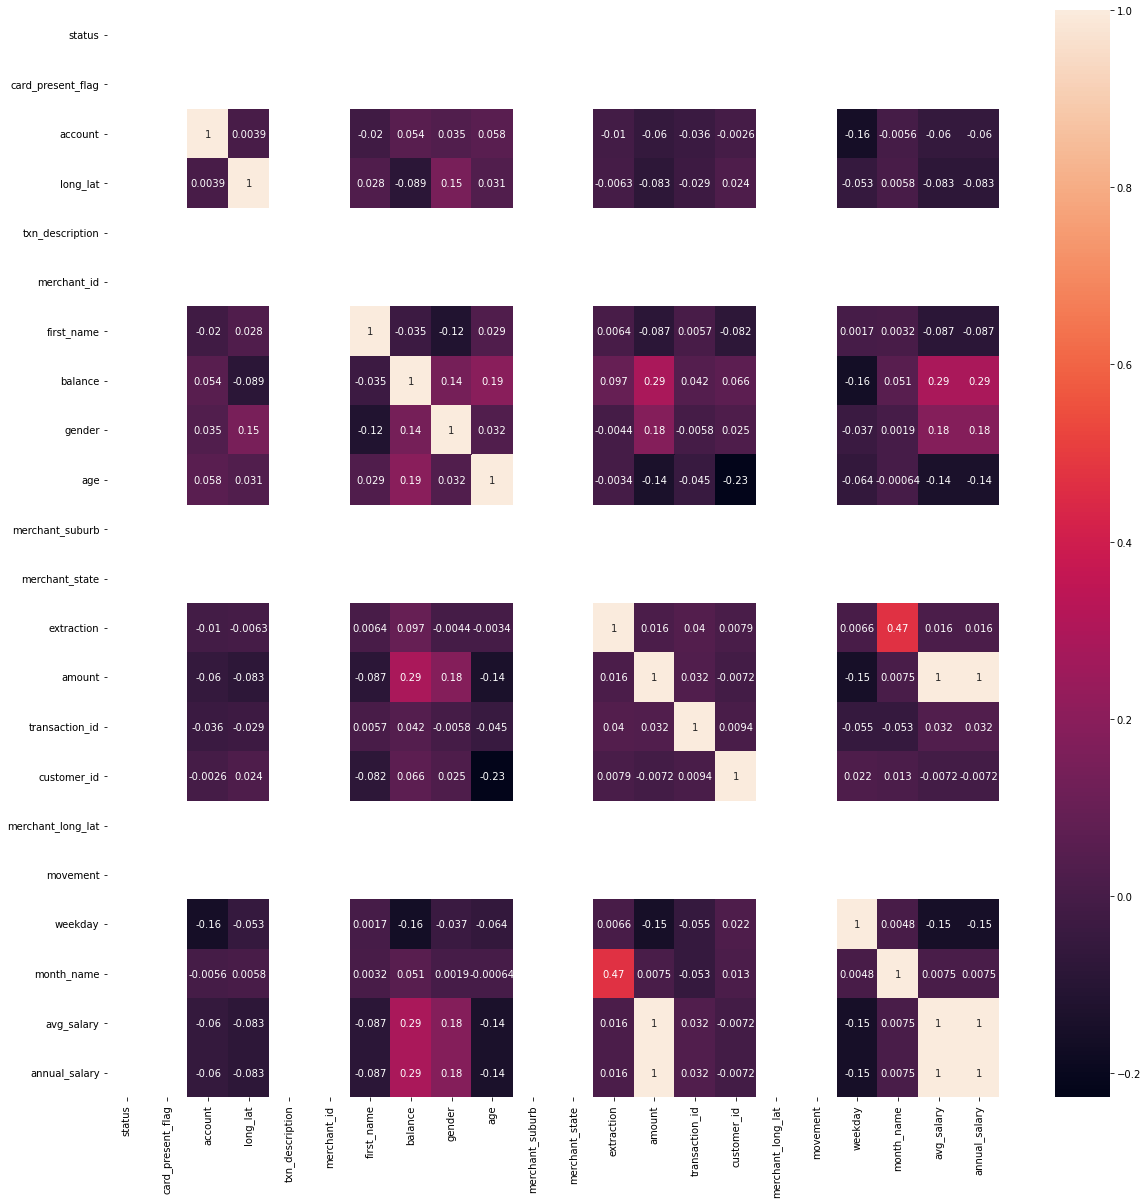

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(pred_sal.corr(), annot=True)
plt.show()

In [23]:
# lets remove the highly correlated features
threshold = 0.5

# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [24]:
correlation(pred_sal,threshold)

{'annual_salary', 'avg_salary'}

In [25]:
pred_sal.drop('avg_salary', axis=1, inplace=True)

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
pred_sal.columns

Index(['status', 'card_present_flag', 'account', 'long_lat', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat', 'movement',
       'weekday', 'month_name', 'annual_salary'],
      dtype='object')

In [27]:
# removing the features which are not important 
pred_sal.drop(['status', 'card_present_flag', 'txn_description', 'merchant_id', 'merchant_suburb', 'merchant_state', 
            'merchant_long_lat', 'movement', 'date'], axis=1, inplace=True)

In [28]:
pred_sal.head()

,account,long_lat,first_name,balance,gender,age,extraction,amount,transaction_id,customer_id,weekday,month_name,annual_salary
50,89,86,30,8342.11,1,23,0,3903.95,528,13,4,0,46847.40
61,19,41,48,2040.58,0,23,1,1626.48,83,47,4,0,19517.76
64,63,82,26,3158.51,1,22,1,983.36,650,70,4,0,11800.32
68,68,40,33,2517.66,1,24,2,1408.08,49,12,4,0,16896.96
70,50,33,41,2271.79,0,43,2,1068.04,833,83,4,0,12816.48


# Ordinary Least Square Model

**Model Building**

In [29]:
# loading the Least square Model
from statsmodels.formula.api import ols

linear_model = ols('pred_sal.annual_salary ~ pred_sal.account+pred_sal.long_lat+pred_sal.first_name+pred_sal.balance+pred_sal.gender+pred_sal.age+pred_sal.extraction+pred_sal.amount+pred_sal.transaction_id+pred_sal.customer_id+pred_sal.weekday+pred_sal.month_name',pred_sal).fit()

In [30]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     pred_sal.annual_salary   R-squared:                       1.000
Model:                                OLS   Adj. R-squared:                  1.000
Method:                     Least Squares   F-statistic:                 7.995e+30
Date:                    Thu, 16 Sep 2021   Prob (F-statistic):               0.00
Time:                            18:02:50   Log-Likelihood:                 19855.
No. Observations:                     883   AIC:                        -3.968e+04
Df Residuals:                         870   BIC:                        -3.962e+04
Df Model:                              12                                         
Covariance Type:                nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -1.7e-11   9.22e-12     -1.843      0.066   -3.51e-11     1.1e-12
pred_sal.account         3.902e-13   5.07e-14      7.700      0.000    2.91e-13     4.9e-13
pred_sal.long_lat       -8.149e-14   4.96e-14     -1.643      0.101   -1.79e-13    1.59e-14
pred_sal.first_name     -8.438e-14    6.5e-14     -1.298      0.195   -2.12e-13    4.32e-14
pred_sal.balance        -1.103e-15   5.06e-17    -21.813      0.000    -1.2e-15      -1e-15
pred_sal.gender         -2.657e-12   2.95e-12     -0.901      0.368   -8.45e-12    3.13e-12
pred_sal.age            -7.105e-14   1.24e-13     -0.571      0.568   -3.15e-13    1.73e-13
pred_sal.extraction     -5.218e-14   1.41e-14     -3.692      0.000   -7.99e-14   -2.44e-14
pred_sal.amount            12.0000   1.35e-15   8.88e+15      0.000      12.000      12.000
pred_sal.transaction_id -3.275e-15   5.58e-15     -0.587      0.557   -1.42e-14    7.67e-15
pred_sal.customer_id    -1.821e-14   5.11e-14     -0.356      0.722   -1.19e-13    8.21e-14
pred_sal.weekday         -1.18e-12   1.01e-12     -1.163      0.245   -3.17e-12    8.11e-13
pred_sal.month_name     -9.948e-13   1.99e-12     -0.499      0.618   -4.91e-12    2.92e-12
==============================================================================
Omnibus:                      816.044   Durbin-Watson:                   1.307
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31391.709
Skew:                           4.175   Prob(JB):                         0.00
Kurtosis:                      30.991   Cond. No.                     2.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here, we observe that for some of the features, P value > 0.05. Hence these must be removed from the equation(model)

In [31]:
linear_model = ols('pred_sal.annual_salary ~ pred_sal.account+pred_sal.balance+pred_sal.extraction+pred_sal.amount',pred_sal).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     pred_sal.annual_salary   R-squared:                       1.000
Model:                                OLS   Adj. R-squared:                  1.000
Method:                     Least Squares   F-statistic:                 4.021e+31
Date:                    Thu, 16 Sep 2021   Prob (F-statistic):               0.00
Time:                            18:02:50   Log-Likelihood:                 20079.
No. Observations:                     883   AIC:                        -4.015e+04
Df Residuals:                         878   BIC:                        -4.012e+04
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2.304e-11    3.5e-12     -6.573      0.000   -2.99e-11   -1.62e-11
pred_sal.account     3.804e-13   3.85e-14      9.876      0.000    3.05e-13    4.56e-13
pred_sal.balance     2.935e-16    3.7e-17      7.935      0.000    2.21e-16    3.66e-16
pred_sal.extraction  1.548e-13   9.62e-15     16.091      0.000    1.36e-13    1.74e-13
pred_sal.amount        12.0000   9.91e-16   1.21e+16      0.000      12.000      12.000
==============================================================================
Omnibus:                        5.690   Durbin-Watson:                   0.499
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                5.780
Skew:                          -0.187   Prob(JB):                       0.0556
Kurtosis:                       2.871   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# Computing the predicted values
pred = linear_model.predict(pred_sal)
pred

50       46847.40
61       19517.76
64       11800.32
68       16896.96
70       12816.48
           ...   
11995    13186.92
12000    13897.80
12001    12517.44
12003    16745.88
12004    31677.12
Length: 883, dtype: float64

In [33]:
# convert pred to Dataframe
pred_df = pd.DataFrame(pred, columns=['Predicted'])

In [34]:
# join predicted values with the dataset
result = pred_sal.join(pred_df)
result.head()

,account,long_lat,first_name,balance,gender,age,extraction,amount,transaction_id,customer_id,weekday,month_name,annual_salary,Predicted
50,89,86,30,8342.11,1,23,0,3903.95,528,13,4,0,46847.40,46847.40
61,19,41,48,2040.58,0,23,1,1626.48,83,47,4,0,19517.76,19517.76
64,63,82,26,3158.51,1,22,1,983.36,650,70,4,0,11800.32,11800.32
68,68,40,33,2517.66,1,24,2,1408.08,49,12,4,0,16896.96,16896.96
70,50,33,41,2271.79,0,43,2,1068.04,833,83,4,0,12816.48,12816.48


In [35]:
# computing residuals ( Actual - Predicted)
residual = linear_model.resid
residual_df = pd.DataFrame(residual,columns=['Residuals'])
result = result.join(residual_df)
result.head()

,account,long_lat,first_name,balance,gender,age,extraction,amount,transaction_id,customer_id,weekday,month_name,annual_salary,Predicted,Residuals
50,89,86,30,8342.11,1,23,0,3903.95,528,13,4,0,46847.40,46847.40,7.275958e-12
61,19,41,48,2040.58,0,23,1,1626.48,83,47,4,0,19517.76,19517.76,2.546585e-11
64,63,82,26,3158.51,1,22,1,983.36,650,70,4,0,11800.32,11800.32,3.637979e-12
68,68,40,33,2517.66,1,24,2,1408.08,49,12,4,0,16896.96,16896.96,3.637979e-12
70,50,33,41,2271.79,0,43,2,1068.04,833,83,4,0,12816.48,12816.48,9.094947e-12


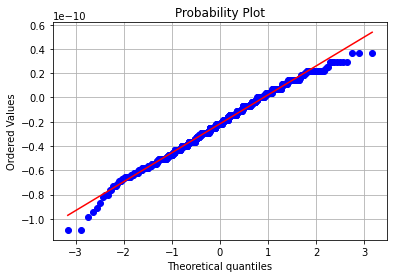

In [36]:
# Normality test on residuals
from scipy import stats

stats.probplot(residual, plot=plt)
plt.grid()
plt.show()

Here, we notice that all the residuals are normally distributed. Hence the model is performing good.

In [37]:
stats.normaltest(residual) 

NormaltestResult(statistic=5.689868671500687, pvalue=0.0581380842081605)

In [38]:
from sklearn import metrics

print("Coefficient of determination : ", metrics.r2_score(pred_sal.annual_salary, pred))
print("Mean Squared Error : ", metrics.mean_squared_error(pred_sal.annual_salary, pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(pred_sal.annual_salary, pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(pred_sal.annual_salary, pred))

Coefficient of determination :  1.0
Mean Squared Error :  1.0389500907792309e-21
Root Mean Squared Error :  3.2232748731363744e-11
Mean Absolute Error :  2.6102394940350564e-11


**Interpretation**

- From the R-squared value, we observe that our Least square model is absolutely accurate to 100%.
- As the mean square error, Root mean sqaure error values are close to 0, which indicates that the Least square model is peforming good in predicting the anual salary.
- The Mean absolute error value is close to zero depecting that our Least square model is very good in predicting.